In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

img = cv2.imread('2.png')#io.imread('https://i.stack.imgur.com/J46nA.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Use fixed threshold to mask black areas
_, thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_OTSU)


In [42]:
def imshow(title, img,cmap="gray"):
    plt.title(title)
    plt.imshow(img,cmap=cmap)

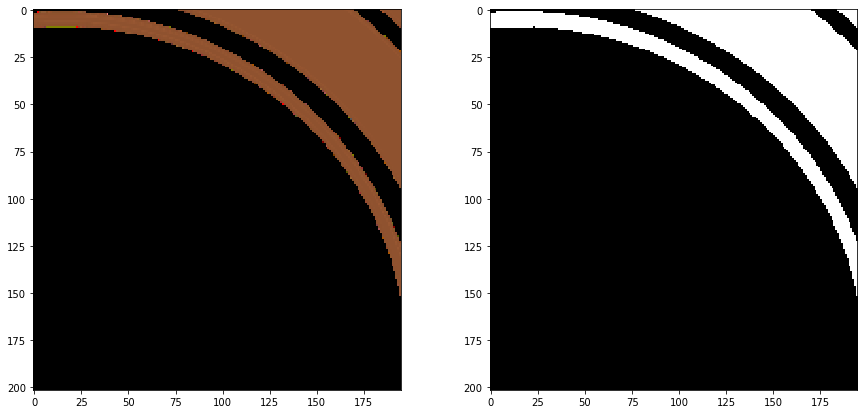

In [43]:
f,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].imshow(img)
ax[1].imshow(thresh,cmap="gray")

In [44]:
params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 10
params.maxThreshold = 255
params.filterByArea = False
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

# params.minArea = 1
        
detector = cv2.SimpleBlobDetector_create(params) # Blob detector 선언
keypoints = detector.detect(thresh)  # Blob labeling 수행


In [45]:
len(keypoints)

1

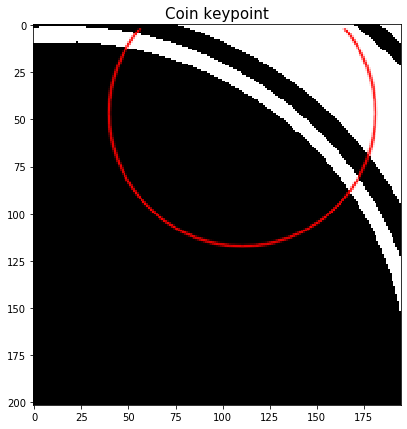

In [46]:
im_with_keypoints = \
cv2.drawKeypoints(thresh, keypoints, np.array([]), (255, 0, 0),
                  cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  # 원본 이미지에 찾은 blob 그리기

plt.figure(figsize=(7,7))
plt.imshow(im_with_keypoints)
plt.title('Coin keypoint', size=15)
plt.show()

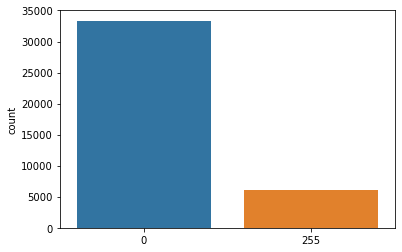

In [47]:
sns.countplot(thresh.flatten())

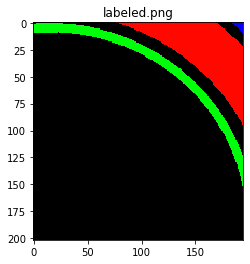

In [48]:
num_labels, labels_im = cv2.connectedComponents(thresh)

def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    imshow('labeled.png', labeled_img)

imshow_components(labels_im)

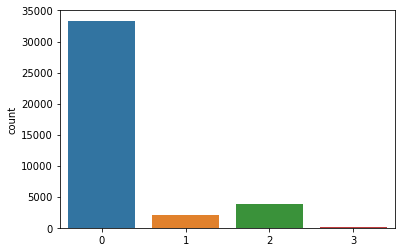

In [49]:
sns.countplot(labels_im.flatten())

In [50]:
df=pd.DataFrame({"a":labels_im.flatten()})

In [51]:
tar=df.a.value_counts()[:4].index.tolist()[1]

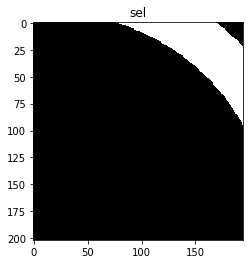

In [54]:
imshow("sel",(labels_im==tar).astype(np.uint8))

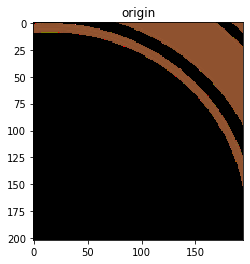

In [53]:
imshow("origin",img)

## Threshold Range

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

img = cv2.imread('threshold.jpg')#io.imread('https://i.stack.imgur.com/J46nA.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [54]:

# Use fixed threshold to mask black areas
_, thresh = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(gray, 110, 255, cv2.THRESH_BINARY)
thresh3=thresh-thresh2

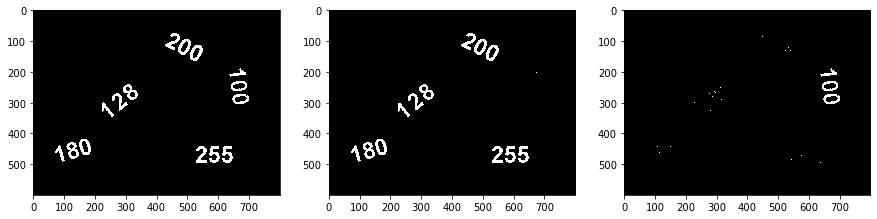

In [55]:
f,ax=plt.subplots(1,3,figsize=(15,6))
ax[0].imshow(thresh,cmap="gray")
ax[1].imshow(thresh2,cmap="gray")
ax[2].imshow(thresh3,cmap="gray")

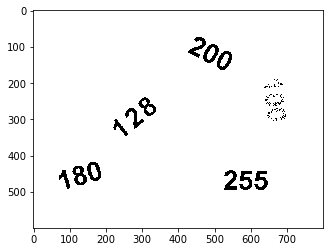

In [43]:
plt.imshow(thresh2,cmap="gray")

In [16]:
255-gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)